Atalov S. (TSI AUCA)

# Random Forest Classifier

Introduction to Machine Learning and Artificial Intelligence

---

<img src = "https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width = "500">

In [361]:
# import libraries (numpy, pandas, matplotlib.pyplot, train test split)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts


## 0. Preparing the Data

In [362]:
titanic_train = 'https://raw.githubusercontent.com/lobachevksy/teaching/main/titanic/train.csv'
df = pd.read_csv(titanic_train)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [363]:
# drop unnecessary columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=["PassengerId","Name","Ticket","Cabin"])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [364]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [365]:
# fill missing values
df["Age"].fillna(value=round(df["Age"].mean()), inplace=True)
df["Embarked"].fillna(value=df["Embarked"].value_counts().idxmax(), inplace=True)


In [366]:
# handle non-numeric values (replacing, dummy variables)
df = pd.get_dummies(df, columns=["Pclass"])
df = pd.get_dummies(df, columns = ["Embarked"])
df["Sex"].replace({"male": 0,"female": 1}, inplace=True)

df.rename(columns={"Gender": "Male"}, inplace=True)


In [367]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1


In [368]:
# train test split
X = df.copy()
y = X.pop('Survived')

X_train, X_test, y_train, y_test = tts(X, y,random_state=42)

# use the same random state to get comparable results

In [369]:
y_train

298    1
884    0
247    1
478    0
305    1
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 668, dtype: int64

In [370]:
X_train

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
298,0,30.00,0,0,30.5000,1,0,0,0,0,1
884,0,25.00,0,0,7.0500,0,0,1,0,0,1
247,1,24.00,0,2,14.5000,0,1,0,0,0,1
478,0,22.00,0,0,7.5208,0,0,1,0,0,1
305,0,0.92,1,2,151.5500,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,1,21.00,0,0,7.6500,0,0,1,0,0,1
270,0,30.00,0,0,31.0000,1,0,0,0,0,1
860,0,41.00,2,0,14.1083,0,0,1,0,0,1
435,1,14.00,1,2,120.0000,1,0,0,0,0,1


---
## 1. One Decision Tree Classifier

Fit the Decision Tree Classifier Model on training data and show the score on test data

In [375]:
from sklearn.tree import DecisionTreeClassifier


In [387]:
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.8071748878923767

---
## 2. Random Forest Classifier

Let's create a function for bootstrapping!

### 2.1. Bootstrap

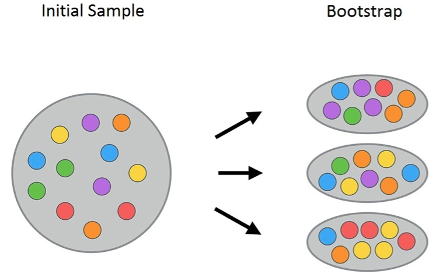

<!--Atalov S.-->

HINT: [`np.random.choice(n_samples, n_samples, replace=True)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [388]:
def bootstrap(X, y):
    # create random subsample
    # your solution:
    X_array = X.values
    y_array = y.values
    n_samples, _ = X_array.shape
    indices = np.random.choice(n_samples,n_samples,replace=True)
    X_sample = X_array[indices]
    y_sample = y_array[indices]
    return X_sample, y_sample

In [389]:
x_s,y_s=bootstrap(X_train,y_train)

### 2.2. Training the Random Forest Classifier

In [390]:
from sklearn.tree import DecisionTreeClassifier

In [391]:
def train_random_forest(X_train, y_train, n_estimators = 100):
    n_samples, n_features = X_train.shape
    trees = []
    max_features = int(np.round(np.sqrt(n_features))) # use only some of the features
    
    for i in range(n_estimators):
        # create and append Decision Trees with max_feature argument
       
        # DecisionTreeClassifier(max_features = max_features)
        # your solution:
        dt =  DecisionTreeClassifier(max_features=max_features)
        trees.append(dt)
        
    # перебираем деревья ранее созданные
    for tree in trees:
        # call the bootstrap function to get random subsamples
        X_sample, y_sample = bootstrap(X_train, y_train)
        
        # fit the each model with bootstraped samples
        
        tree.fit(X_sample,y_sample)
        
    if len(trees) == n_estimators:
        print(f"Натренировано {n_estimators} деревьев!")
    else:
        print("Ошибка")
    
    return trees

### 2.3. Making a predictions using Random Forest Classifier

In [392]:
# находит какой класс встречается чаще всего
def most_common_label(y):
    return np.bincount(y.astype("int")).argmax()

In [393]:
def make_predictions(trees, X):
    # create an array to store the predictions
    predictions = np.zeros((X.shape[0], len(trees)))
    
    for i,tree in enumerate(trees):
        predictions[:, i] = tree.predict(X)
        
        
    # voting - finalizing predictions
    final_predictions = []
    for pred in predictions:
        # use the function above (most_common_label) to find the majority class (prediction)
        majority_cl = most_common_label(pred)
        final_predictions.append(majority_cl)
        
    return final_predictions

### 2.4. Score function

score = the number of correctly predicted / total number of samples

In [399]:
def score(trees, X, y):
    # make predictions
    y_hat = make_predictions(trees, X)
    
    # compare how much of the predictions is True
    true = []
    
    for i in range(len(y_hat)):
        if i < len(y):
            if y_hat[i] == y.iloc[i]:
            
            # your code
            # append `1` to the true
                true.append(1)
            
    score = sum(true) / len(y)        
    return score

### 2.5. Finally, Experiment!

<!--Atalov S.-->

In [400]:
trees = train_random_forest(X_train, y_train, n_estimators = 100)

Натренировано 100 деревьев!


In [401]:
# score on train data

score(trees, X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fi

0.9805389221556886

In [402]:
# score on test data

score(trees, X_test, y_test)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fi

0.7982062780269058

---
## 3. Random Forest Classifier using sklearn :)

In [403]:
from sklearn.ensemble import RandomForestClassifier

In [404]:
model = RandomForestClassifier(n_estimators = 100)

In [405]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [407]:
model.score(X_test,y_test)

0.7892376681614349